In [0]:
# Import necessary libraries
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import RMSprop
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np

In [0]:
#Loading the Dataset, splitting into test and train
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [48]:
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
# Defining target values i.e y_train and y_test
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

Setting the initial configuration for model, lets take the batch size for training as 200, Number of diff class is 10 , and let's set the initial epoch's to 30

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200
num_classes = 10
epochs = 30

Let's create a benchmark model, we will compare this model with the ones with different configurations

In [0]:
# Creating a model and adding various layers
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(3072,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [9]:
# Lets fit the data into the model created
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 58us/step - loss: 0.0891 - acc: 0.1608 - val_loss: 0.0857 - val_acc: 0.2320
Epoch 2/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0856 - acc: 0.2326 - val_loss: 0.0832 - val_acc: 0.2715
Epoch 3/30
50000/50000 [==============================] - 2s 41us/step - loss: 0.0836 - acc: 0.2657 - val_loss: 0.0816 - val_acc: 0.3106
Epoch 4/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0822 - acc: 0.2923 - val_loss: 0.0804 - val_acc: 0.3298
Epoch 5/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0812 - acc: 0.3088 - val_loss: 0.0794 - val_acc: 0.3453
Epoch 6/30
50000/50000 [==============================] - 2s 41us/step - loss: 0.0802 - acc: 0.3239 - val_loss: 0.0785 - val_acc: 0.3570
Epoch 7/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0794 - acc: 0.3347 - val_loss: 0.0778 - val_acc

In [0]:
# Test Loss and Test Accuracy
def score_loss_accuracy(score):
  print('Test loss:', score[0])
  print('Test accuracy:', score[1])

In [11]:
score_loss_accuracy(score)

Test loss: 0.07010202184915543
Test accuracy: 0.4458


In [0]:
# Plotting Model Accuracy- Training Vs Validation
def plotModelAccuracy(history):
  plt.plot(history.history['acc'])
  plt.plot(history.history['val_acc'])
  plt.rcParams['figure.figsize'] = (8, 6)
  plt.title('Model Accuracy- Training Vs Validation')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validtaion'], loc='upper left')
  plt.show()

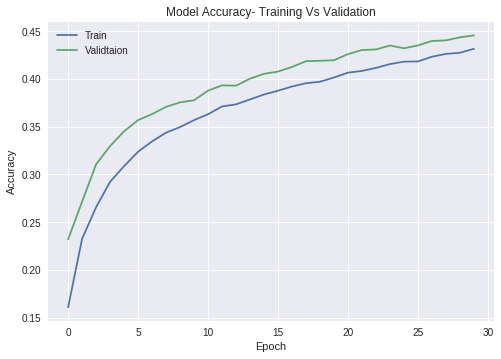

In [13]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

In [0]:
# Plotting Model Loss- Training Vs Validation
def plotModelLoss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss- Training Vs Validation')
  plt.rcParams['figure.figsize'] = (8, 6)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validtaion'], loc='upper left')
  plt.show()

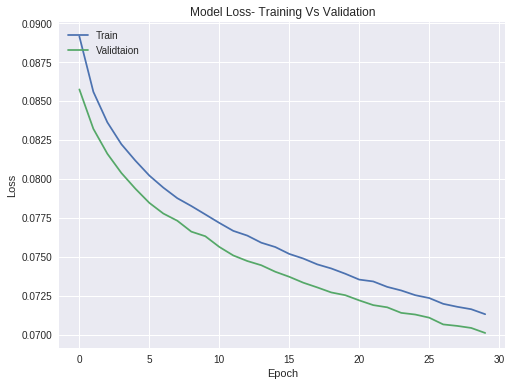

In [15]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

Let's consider the results of this configuration of MLP model as Benchmark/Base. We will compare all other configurations against this model and try to come up with a more optimized model which provides better accuracy and less loss.



*   Test Accuracy : 0.4458
*  Test Loss: 0.07010

**Number of Epochs**

Lets Change the Number of Epochs and see the difference in model's accuracy and loss

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200
num_classes = 10
epochs = 70 # Changing the epoch from 30 to 70

In [0]:
# Creating a model and adding various layers
model2 = Sequential()
model2.add(Dense(512, activation='relu', input_shape=(3072,)))
model2.add(Dropout(0.2))
model2.add(Dense(512, activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(num_classes, activation='softmax'))

In [18]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_4 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model2.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [20]:
# Lets fit the data into the model created
history = model2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model2.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 2s 48us/step - loss: 0.0884 - acc: 0.1728 - val_loss: 0.0854 - val_acc: 0.2647
Epoch 2/70
50000/50000 [==============================] - 2s 42us/step - loss: 0.0851 - acc: 0.2451 - val_loss: 0.0830 - val_acc: 0.2864
Epoch 3/70
50000/50000 [==============================] - 2s 42us/step - loss: 0.0834 - acc: 0.2714 - val_loss: 0.0815 - val_acc: 0.3168
Epoch 4/70
50000/50000 [==============================] - 2s 42us/step - loss: 0.0822 - acc: 0.2957 - val_loss: 0.0804 - val_acc: 0.3341
Epoch 5/70
50000/50000 [==============================] - 2s 42us/step - loss: 0.0812 - acc: 0.3113 - val_loss: 0.0795 - val_acc: 0.3412
Epoch 6/70
50000/50000 [==============================] - 2s 42us/step - loss: 0.0803 - acc: 0.3234 - val_loss: 0.0786 - val_acc: 0.3549
Epoch 7/70
50000/50000 [==============================] - 2s 42us/step - loss: 0.0795 - acc: 0.3344 - val_loss: 0.0779 - val_acc

In [21]:
score_loss_accuracy(score)

Test loss: 0.0653980015039444
Test accuracy: 0.4865


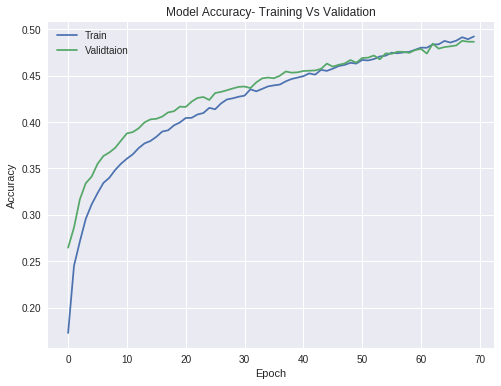

In [22]:
plotModelAccuracy(history)

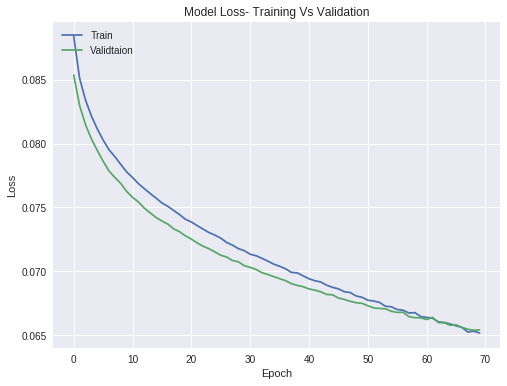

In [23]:
plotModelLoss(history)

**Observation on Changing Epochs:**

Increasing the Epochs to 70 results in increasing the accuracy on both test and validation data.


*   Test Loss: 0.06539
*   Test Accuracy: 0.4865



**Batch Size**

Lets Change the Batch Size, We will test same model with batch sizes of 100,200 and 300. We already have batch size of 200 in out benchmark model.

Batch size - 100

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 100 # Changing the batch size from 200 to 100
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model3_1 = Sequential()
model3_1.add(Dense(512, activation='relu', input_shape=(3072,)))
model3_1.add(Dropout(0.2))
model3_1.add(Dense(512, activation='relu'))
model3_1.add(Dropout(0.2))
model3_1.add(Dense(num_classes, activation='softmax'))

In [26]:
model3_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dropout_5 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3_1.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [28]:
# Lets fit the data into the model created
history = model3_1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model3_1.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 75us/step - loss: 0.0877 - acc: 0.1911 - val_loss: 0.0835 - val_acc: 0.2985
Epoch 2/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0832 - acc: 0.2766 - val_loss: 0.0804 - val_acc: 0.3351
Epoch 3/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0809 - acc: 0.3142 - val_loss: 0.0784 - val_acc: 0.3582
Epoch 4/30
50000/50000 [==============================] - 3s 70us/step - loss: 0.0793 - acc: 0.3327 - val_loss: 0.0771 - val_acc: 0.3724
Epoch 5/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0782 - acc: 0.3503 - val_loss: 0.0761 - val_acc: 0.3769
Epoch 6/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0772 - acc: 0.3624 - val_loss: 0.0754 - val_acc: 0.3902
Epoch 7/30
50000/50000 [==============================] - 3s 70us/step - loss: 0.0765 - acc: 0.3711 - val_loss: 0.0745 - val_acc

In [29]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.0665050653219223
Test accuracy: 0.4772


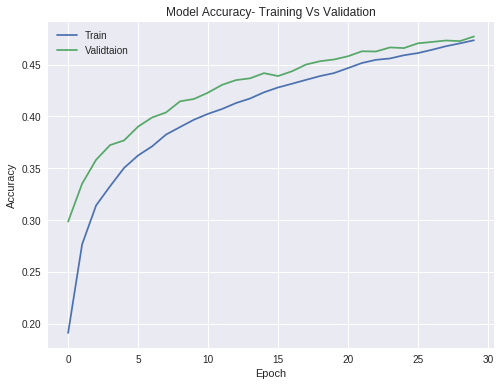

In [30]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

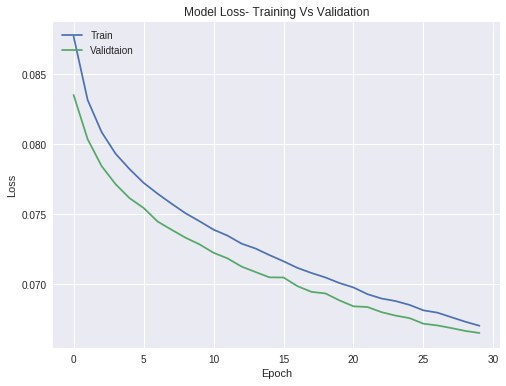

In [31]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

Batch Size - 300

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 300 # Changing the batch size from 200 to 300
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model3_2 = Sequential()
model3_2.add(Dense(512, activation='relu', input_shape=(3072,)))
model3_2.add(Dropout(0.2))
model3_2.add(Dense(512, activation='relu'))
model3_2.add(Dropout(0.2))
model3_2.add(Dense(num_classes, activation='softmax'))

In [34]:
model3_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_8 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model3_2.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [36]:
# Lets fit the data into the model created
history = model3_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model3_2.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 38us/step - loss: 0.0896 - acc: 0.1441 - val_loss: 0.0870 - val_acc: 0.2349
Epoch 2/30
50000/50000 [==============================] - 2s 33us/step - loss: 0.0869 - acc: 0.2103 - val_loss: 0.0848 - val_acc: 0.2667
Epoch 3/30
50000/50000 [==============================] - 2s 33us/step - loss: 0.0852 - acc: 0.2426 - val_loss: 0.0832 - val_acc: 0.2916
Epoch 4/30
50000/50000 [==============================] - 2s 33us/step - loss: 0.0839 - acc: 0.2634 - val_loss: 0.0820 - val_acc: 0.3107
Epoch 5/30
50000/50000 [==============================] - 2s 32us/step - loss: 0.0828 - acc: 0.2810 - val_loss: 0.0810 - val_acc: 0.3259
Epoch 6/30
50000/50000 [==============================] - 2s 33us/step - loss: 0.0820 - acc: 0.2939 - val_loss: 0.0801 - val_acc: 0.3351
Epoch 7/30
50000/50000 [==============================] - 2s 32us/step - loss: 0.0812 - acc: 0.3079 - val_loss: 0.0794 - val_acc

In [37]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.07218753966093064
Test accuracy: 0.4238


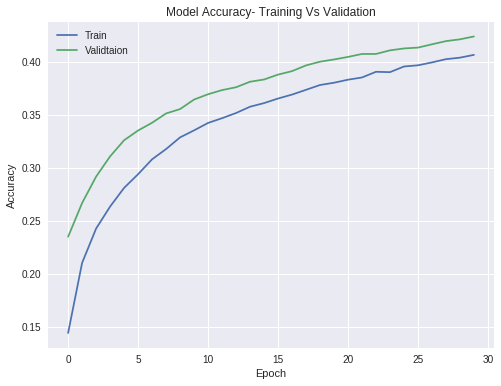

In [38]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

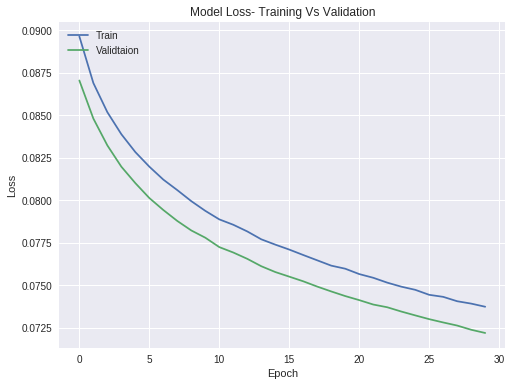

In [39]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

**Observations on changing batch size**

Batch size -100


*   Test Loss: 0.0665
*   Test Accuracy: 0.4772

Batch size -300


*   Test Loss: 0.0721
*   Test Accuracy: 0.4238

Accuracy increases when batch size is less and decreases when batch size is more, similarly Loss is decreased on decreasing batch size and increased on increasing batch size.

**Network Configuration - A- Number of Neurons in a layer**

Lets change the number of neuron's in a layer in model, We will increase the number of neurons to 1.5 times and 3 times that of benchmark model


Number of Neurons is 1.5 times, i.e 512*1.5 =768

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
model4_1 = Sequential()
model4_1.add(Dense(768, activation='relu', input_shape=(3072,)))
model4_1.add(Dropout(0.2))
model4_1.add(Dense(768, activation='relu'))
model4_1.add(Dropout(0.2))
model4_1.add(Dense(num_classes, activation='softmax'))

In [42]:
model4_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 768)               2360064   
_________________________________________________________________
dropout_9 (Dropout)          (None, 768)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 768)               590592    
_________________________________________________________________
dropout_10 (Dropout)         (None, 768)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 10)                7690      
Total params: 2,958,346
Trainable params: 2,958,346
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4_1.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [44]:
# Lets fit the data into the model created
history = model4_1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model4_1.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 54us/step - loss: 0.0888 - acc: 0.1600 - val_loss: 0.0853 - val_acc: 0.2506
Epoch 2/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0852 - acc: 0.2393 - val_loss: 0.0826 - val_acc: 0.2939
Epoch 3/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0832 - acc: 0.2748 - val_loss: 0.0810 - val_acc: 0.3185
Epoch 4/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0817 - acc: 0.3021 - val_loss: 0.0797 - val_acc: 0.3372
Epoch 5/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0806 - acc: 0.3182 - val_loss: 0.0787 - val_acc: 0.3538
Epoch 6/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0796 - acc: 0.3361 - val_loss: 0.0777 - val_acc: 0.3655
Epoch 7/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0788 - acc: 0.3465 - val_loss: 0.0770 - val_acc

In [45]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.0695855678319931
Test accuracy: 0.4491


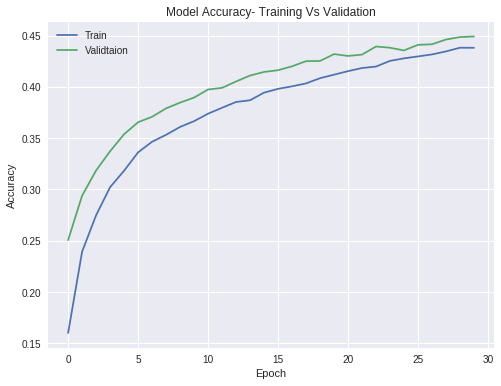

In [46]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

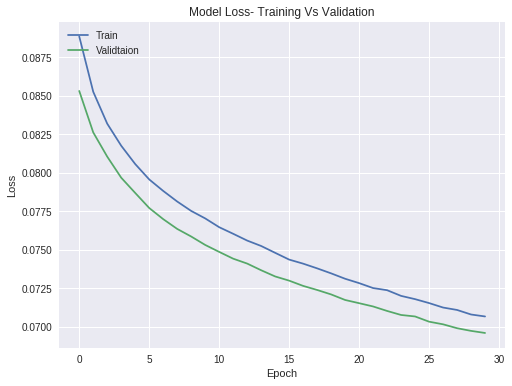

In [47]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

Number of Neurons is 3 times, i.e 512*3 =1536

In [0]:
model4_2 = Sequential()
model4_2.add(Dense(1536, activation='relu', input_shape=(3072,)))
model4_2.add(Dropout(0.2))
model4_2.add(Dense(1536, activation='relu'))
model4_2.add(Dropout(0.2))
model4_2.add(Dense(num_classes, activation='softmax'))

In [49]:
model4_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 1536)              4720128   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1536)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1536)              2360832   
_________________________________________________________________
dropout_12 (Dropout)         (None, 1536)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 10)                15370     
Total params: 7,096,330
Trainable params: 7,096,330
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4_2.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [51]:
# Lets fit the data into the model created
history = model4_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model4_2.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 81us/step - loss: 0.0878 - acc: 0.1892 - val_loss: 0.0840 - val_acc: 0.2789
Epoch 2/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0838 - acc: 0.2661 - val_loss: 0.0813 - val_acc: 0.3199
Epoch 3/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0817 - acc: 0.3030 - val_loss: 0.0796 - val_acc: 0.3430
Epoch 4/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0802 - acc: 0.3273 - val_loss: 0.0783 - val_acc: 0.3600
Epoch 5/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0791 - acc: 0.3402 - val_loss: 0.0773 - val_acc: 0.3677
Epoch 6/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0783 - acc: 0.3506 - val_loss: 0.0765 - val_acc: 0.3756
Epoch 7/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0774 - acc: 0.3609 - val_loss: 0.0759 - val_acc

In [52]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.06870642488002777
Test accuracy: 0.4581


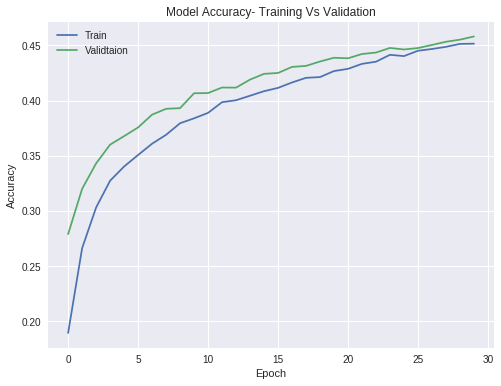

In [53]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

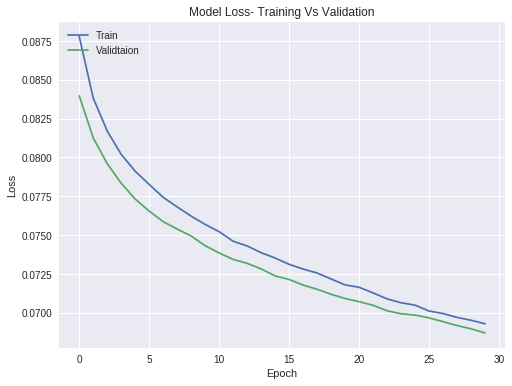

In [54]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

**Observations on changing Number of Neurons per layer**

Number of Neurons is 1.5 times, i.e 512*1.5 =768


*   Test Loss: 0.0695
*   Test Accuracy: 0.4491

Number of Neurons is 3 times, i.e 512*3 =1536


*   Test Loss: 0.0687
*   Test Accuracy: 0.4581

Accuracy increases marginally on increasing the Number of neurons per layer, and similarly there is marginal decrease in loss.

**Network Configuration -B- Number of Layers**

Let's increase the layers by 2 and 4 from thebenchmark model.


Adding 2 more hidden layers from benchmark model

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
model5_1 = Sequential()
model5_1.add(Dense(512, activation='relu', input_shape=(3072,)))
model5_1.add(Dropout(0.2))
model5_1.add(Dense(512, activation='relu'))
model5_1.add(Dropout(0.2))
model5_1.add(Dense(512, activation='relu'))
model5_1.add(Dropout(0.2))
model5_1.add(Dense(512, activation='relu'))
model5_1.add(Dropout(0.2))
model5_1.add(Dense(num_classes, activation='softmax'))

In [57]:
model5_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_15 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 512)               262656    
__________

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model5_1.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [59]:
# Lets fit the data into the model created
history = model5_1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model5_1.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 60us/step - loss: 0.0900 - acc: 0.1221 - val_loss: 0.0887 - val_acc: 0.1501
Epoch 2/30
50000/50000 [==============================] - 2s 49us/step - loss: 0.0888 - acc: 0.1573 - val_loss: 0.0872 - val_acc: 0.2067
Epoch 3/30
50000/50000 [==============================] - 2s 49us/step - loss: 0.0876 - acc: 0.1907 - val_loss: 0.0857 - val_acc: 0.2420
Epoch 4/30
50000/50000 [==============================] - 2s 49us/step - loss: 0.0865 - acc: 0.2122 - val_loss: 0.0843 - val_acc: 0.2683
Epoch 5/30
50000/50000 [==============================] - 2s 48us/step - loss: 0.0854 - acc: 0.2306 - val_loss: 0.0832 - val_acc: 0.2815
Epoch 6/30
50000/50000 [==============================] - 2s 48us/step - loss: 0.0845 - acc: 0.2428 - val_loss: 0.0822 - val_acc: 0.2999
Epoch 7/30
50000/50000 [==============================] - 2s 48us/step - loss: 0.0837 - acc: 0.2606 - val_loss: 0.0814 - val_acc

In [60]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.07146477665901184
Test accuracy: 0.4226


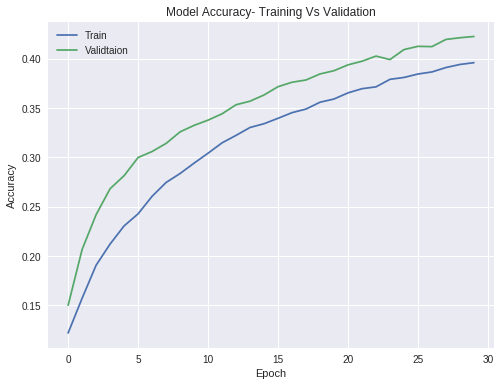

In [61]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

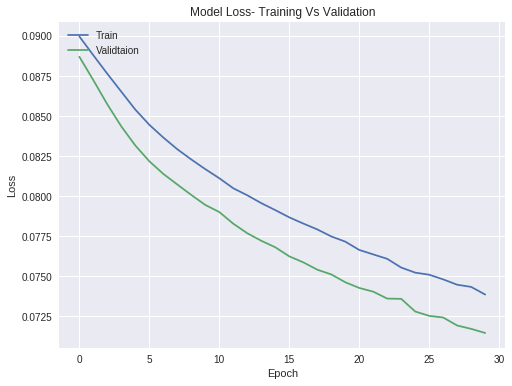

In [62]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
model5_2 = Sequential()
model5_2.add(Dense(512, activation='relu', input_shape=(3072,)))
model5_2.add(Dropout(0.2))
model5_2.add(Dense(512, activation='relu'))
model5_2.add(Dropout(0.2))
model5_2.add(Dense(512, activation='relu'))
model5_2.add(Dropout(0.2))
model5_2.add(Dense(512, activation='relu'))
model5_2.add(Dropout(0.2))
model5_2.add(Dense(512, activation='relu'))
model5_2.add(Dropout(0.2))
model5_2.add(Dense(512, activation='relu'))
model5_2.add(Dropout(0.2))
model5_2.add(Dense(num_classes, activation='softmax'))

In [65]:
model5_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_17 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_18 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_19 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 512)               262656    
__________

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model5_2.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [67]:
# Lets fit the data into the model created
history = model5_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model5_2.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 69us/step - loss: 0.0902 - acc: 0.0992 - val_loss: 0.0898 - val_acc: 0.1071
Epoch 2/30
50000/50000 [==============================] - 3s 53us/step - loss: 0.0900 - acc: 0.1118 - val_loss: 0.0896 - val_acc: 0.1139
Epoch 3/30
50000/50000 [==============================] - 3s 52us/step - loss: 0.0899 - acc: 0.1164 - val_loss: 0.0894 - val_acc: 0.1419
Epoch 4/30
50000/50000 [==============================] - 3s 52us/step - loss: 0.0897 - acc: 0.1285 - val_loss: 0.0892 - val_acc: 0.1635
Epoch 5/30
50000/50000 [==============================] - 3s 52us/step - loss: 0.0894 - acc: 0.1392 - val_loss: 0.0887 - val_acc: 0.1889
Epoch 6/30
50000/50000 [==============================] - 3s 52us/step - loss: 0.0891 - acc: 0.1489 - val_loss: 0.0881 - val_acc: 0.2034
Epoch 7/30
50000/50000 [==============================] - 3s 52us/step - loss: 0.0886 - acc: 0.1614 - val_loss: 0.0873 - val_acc

In [68]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.07584989387989044
Test accuracy: 0.3657


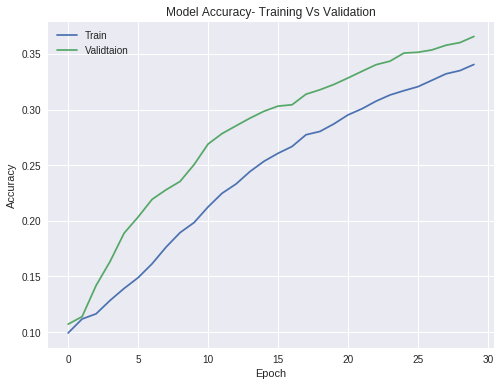

In [69]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

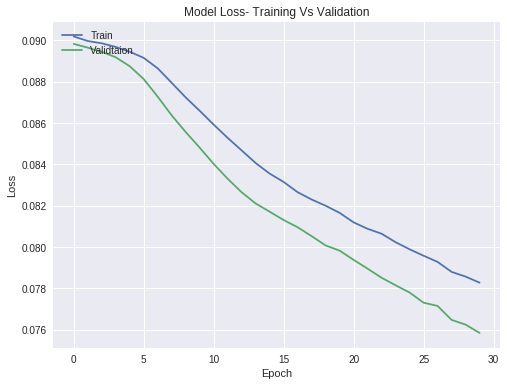

In [70]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

**Observations on changing Number layers**

Total number of layers is 4


*   Test Loss: 0.0714
*   Test Accuracy: 0.4226

Total number of layers is 6


*   Test Loss: 0.0758
*   Test Accuracy: 0.3657

There is a consistent decrease in Accuracy and consistent increase in loss , on increasing the number of layers

Learning Rate

Increasing the learning rate to 0.10

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model6_1 = Sequential()
model6_1.add(Dense(512, activation='relu', input_shape=(3072,)))
model6_1.add(Dropout(0.2))
model6_1.add(Dense(512, activation='relu'))
model6_1.add(Dropout(0.2))
model6_1.add(Dense(num_classes, activation='softmax'))

In [73]:
model6_1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_23 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_24 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_33 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True) # Increasing the learning rate to 0.1 from 0.01
model6_1.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [75]:
# Lets fit the data into the model created
history = model6_1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model6_1.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 53us/step - loss: 0.0829 - acc: 0.2744 - val_loss: 0.0772 - val_acc: 0.3663
Epoch 2/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0771 - acc: 0.3635 - val_loss: 0.0742 - val_acc: 0.3981
Epoch 3/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0746 - acc: 0.3937 - val_loss: 0.0719 - val_acc: 0.4274
Epoch 4/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0727 - acc: 0.4145 - val_loss: 0.0704 - val_acc: 0.4393
Epoch 5/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0714 - acc: 0.4274 - val_loss: 0.0693 - val_acc: 0.4537
Epoch 6/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0703 - acc: 0.4383 - val_loss: 0.0684 - val_acc: 0.4542
Epoch 7/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0691 - acc: 0.4511 - val_loss: 0.0680 - val_acc

In [76]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.06034057726860046
Test accuracy: 0.53


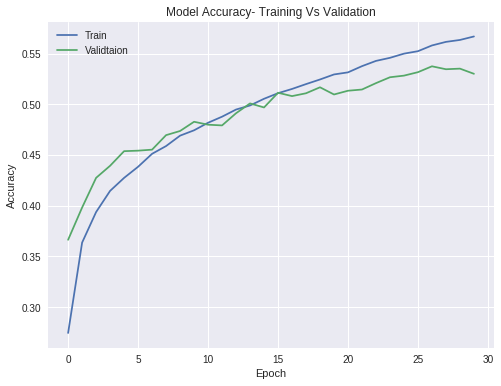

In [77]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

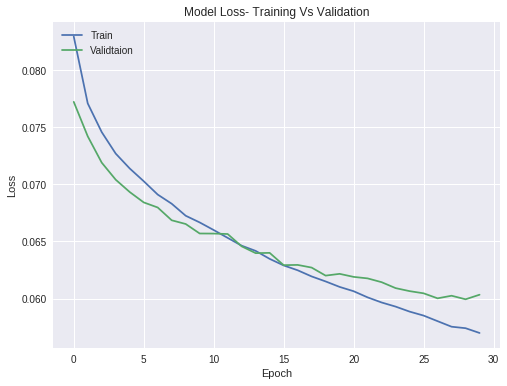

In [78]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

Decreasing the learning rate to 0.005 from 0.01

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model6_2 = Sequential()
model6_2.add(Dense(512, activation='relu', input_shape=(3072,)))
model6_2.add(Dropout(0.2))
model6_2.add(Dense(512, activation='relu'))
model6_2.add(Dropout(0.2))
model6_2.add(Dense(num_classes, activation='softmax'))

In [81]:
model6_2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dropout_25 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_26 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_36 (Dense)             (None, 10)                5130      
Total params: 1,841,162
Trainable params: 1,841,162
Non-trainable params: 0
_________________________________________________________________


In [0]:
sgd = optimizers.SGD(lr=0.005, decay=1e-6, momentum=0.9, nesterov=True) # Increasing the learning rate to 0.01 from 0.005
model6_2.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [83]:
# Lets fit the data into the model created
history = model6_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model6_2.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 55us/step - loss: 0.0900 - acc: 0.1389 - val_loss: 0.0874 - val_acc: 0.2159
Epoch 2/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0875 - acc: 0.1971 - val_loss: 0.0855 - val_acc: 0.2452
Epoch 3/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0860 - acc: 0.2274 - val_loss: 0.0841 - val_acc: 0.2741
Epoch 4/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0848 - acc: 0.2496 - val_loss: 0.0830 - val_acc: 0.2890
Epoch 5/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0838 - acc: 0.2697 - val_loss: 0.0820 - val_acc: 0.3089
Epoch 6/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0831 - acc: 0.2799 - val_loss: 0.0813 - val_acc: 0.3189
Epoch 7/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0823 - acc: 0.2939 - val_loss: 0.0806 - val_acc

In [84]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.07399058748483658
Test accuracy: 0.4043


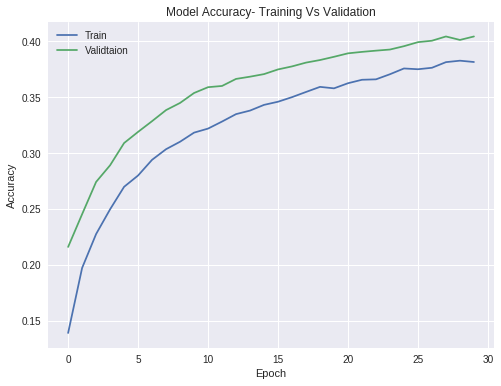

In [85]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

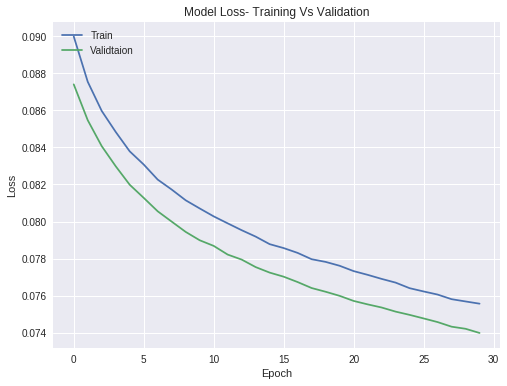

In [86]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

**Observations on changing Learning rate**

Increasing learning rate from 0.01 to 0.1

*   Test Loss: 0.0603
*   Test Accuracy: 0.53

Decreasing learning rate from 0.01 to 0.005

*   Test Loss: 0.0739
*   Test Accuracy: 0.4043

Accuracy incerases on increasing the learning rate and decreases on decreasing the learning rate. Similarly, learning rate is inversly propotional to Loss

**Activation Function**

We will compare our benchmark model against tanh, sigmoid, elu and Leaky-Relu activation functions

Tanh Activation function

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model7_1 = Sequential()
model7_1.add(Dense(512, activation='tanh', input_shape=(3072,)))
model7_1.add(Dropout(0.2))
model7_1.add(Dense(512, activation='tanh'))
model7_1.add(Dropout(0.2))
model7_1.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model7_1.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [90]:
# Lets fit the data into the model created
history = model7_1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model7_1.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 58us/step - loss: 0.0884 - acc: 0.1795 - val_loss: 0.0836 - val_acc: 0.2798
Epoch 2/30
50000/50000 [==============================] - 2s 49us/step - loss: 0.0837 - acc: 0.2661 - val_loss: 0.0805 - val_acc: 0.3298
Epoch 3/30
50000/50000 [==============================] - 2s 47us/step - loss: 0.0812 - acc: 0.3081 - val_loss: 0.0788 - val_acc: 0.3486
Epoch 4/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0797 - acc: 0.3325 - val_loss: 0.0777 - val_acc: 0.3606
Epoch 5/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0787 - acc: 0.3450 - val_loss: 0.0770 - val_acc: 0.3692
Epoch 6/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0778 - acc: 0.3551 - val_loss: 0.0763 - val_acc: 0.3759
Epoch 7/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0773 - acc: 0.3619 - val_loss: 0.0760 - val_acc

In [91]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.07244842131137848
Test accuracy: 0.4183


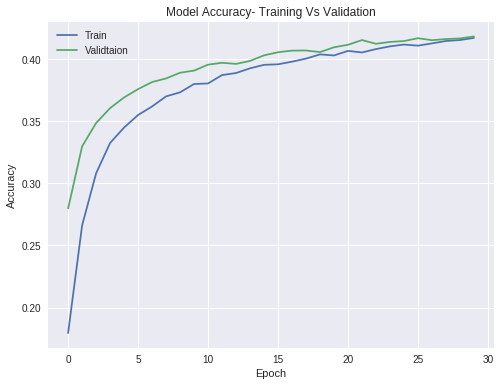

In [92]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

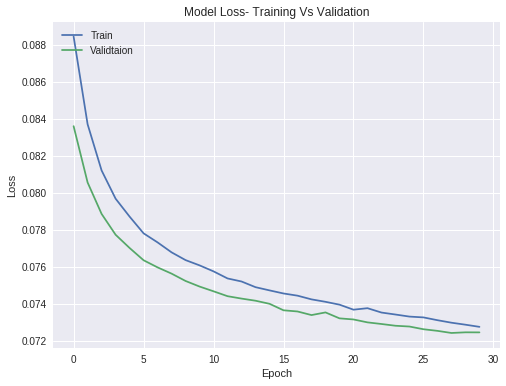

In [93]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

Sigmoid Activation Function

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model7_2 = Sequential()
model7_2.add(Dense(512, activation='sigmoid', input_shape=(3072,)))
model7_2.add(Dropout(0.2))
model7_2.add(Dense(512, activation='sigmoid'))
model7_2.add(Dropout(0.2))
model7_2.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model7_2.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [97]:
# Lets fit the data into the model created
history = model7_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model7_2.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 60us/step - loss: 0.0921 - acc: 0.1006 - val_loss: 0.0899 - val_acc: 0.1094
Epoch 2/30
50000/50000 [==============================] - 2s 44us/step - loss: 0.0911 - acc: 0.1040 - val_loss: 0.0899 - val_acc: 0.1551
Epoch 3/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0910 - acc: 0.1045 - val_loss: 0.0898 - val_acc: 0.1727
Epoch 4/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0909 - acc: 0.1061 - val_loss: 0.0897 - val_acc: 0.1569
Epoch 5/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.0908 - acc: 0.1108 - val_loss: 0.0896 - val_acc: 0.1741
Epoch 6/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0907 - acc: 0.1118 - val_loss: 0.0895 - val_acc: 0.1279
Epoch 7/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0907 - acc: 0.1127 - val_loss: 0.0895 - val_acc

In [98]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.08717682682275772
Test accuracy: 0.2413


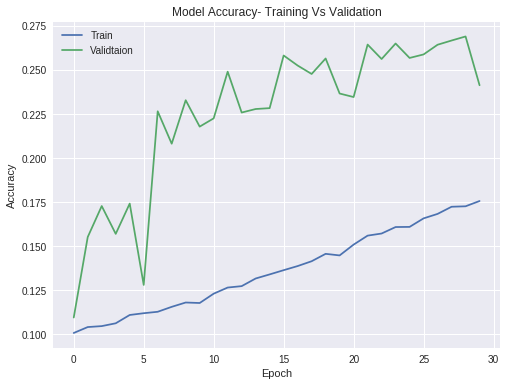

In [99]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

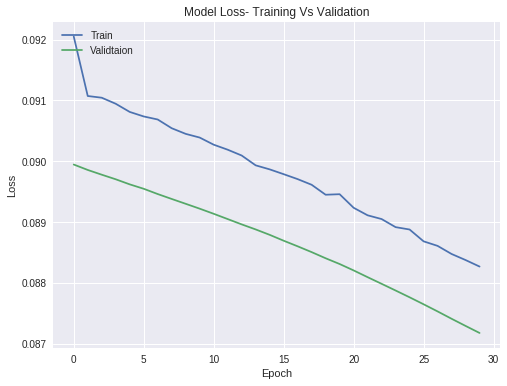

In [100]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

Elu Activation function

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model7_3 = Sequential()
model7_3.add(Dense(512, activation='elu', input_shape=(3072,)))
model7_3.add(Dropout(0.2))
model7_3.add(Dense(512, activation='elu'))
model7_3.add(Dropout(0.2))
model7_3.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model7_3.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [32]:
# Lets fit the data into the model created
history = model7_3.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model7_3.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 4s 82us/step - loss: 0.0883 - acc: 0.1890 - val_loss: 0.0829 - val_acc: 0.2983
Epoch 2/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0830 - acc: 0.2818 - val_loss: 0.0800 - val_acc: 0.3391
Epoch 3/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.0807 - acc: 0.3167 - val_loss: 0.0784 - val_acc: 0.3536
Epoch 4/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.0794 - acc: 0.3354 - val_loss: 0.0776 - val_acc: 0.3720
Epoch 5/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.0784 - acc: 0.3513 - val_loss: 0.0768 - val_acc: 0.3743
Epoch 6/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0777 - acc: 0.3594 - val_loss: 0.0762 - val_acc: 0.3797
Epoch 7/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0771 - acc: 0.3672 - val_loss: 0.0756 - val_acc

In [33]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.07163846416473389
Test accuracy: 0.4271


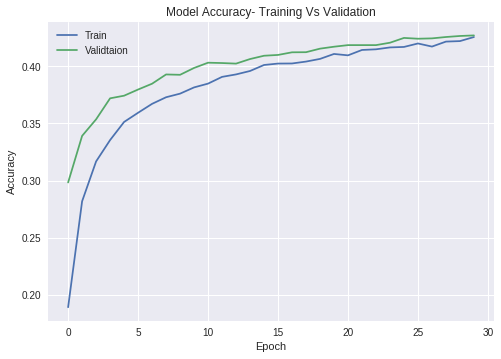

In [34]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

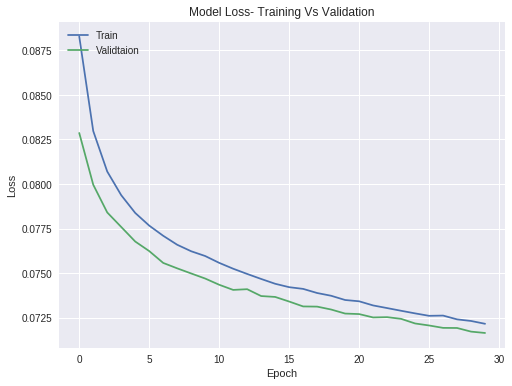

In [35]:
# Plotting Model Accuracy- Training Vs Validation
plotModelLoss(history)

Leaky_Relu Activation function

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model7_4 = Sequential()
model7_4.add(Dense(512, activation='linear', input_shape=(3072,)))
model7_4.add(LeakyReLU(alpha=.001))
model7_4.add(Dropout(0.2))
model7_4.add(Dense(512, activation='linear'))
model7_4.add(LeakyReLU(alpha=.001))
model7_4.add(Dropout(0.2))
model7_4.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model7_4.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [42]:
# Lets fit the data into the model created
history = model7_4.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model7_4.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 2s 50us/step - loss: 0.0887 - acc: 0.1669 - val_loss: 0.0854 - val_acc: 0.2450
Epoch 2/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0854 - acc: 0.2363 - val_loss: 0.0829 - val_acc: 0.2877
Epoch 3/30
50000/50000 [==============================] - 2s 42us/step - loss: 0.0834 - acc: 0.2715 - val_loss: 0.0814 - val_acc: 0.3153
Epoch 4/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.0821 - acc: 0.2952 - val_loss: 0.0801 - val_acc: 0.3341
Epoch 5/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.0810 - acc: 0.3109 - val_loss: 0.0792 - val_acc: 0.3437
Epoch 6/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.0802 - acc: 0.3251 - val_loss: 0.0784 - val_acc: 0.3583
Epoch 7/30
50000/50000 [==============================] - 2s 43us/step - loss: 0.0794 - acc: 0.3371 - val_loss: 0.0776 - val_acc

In [43]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.07022452216148377
Test accuracy: 0.4398


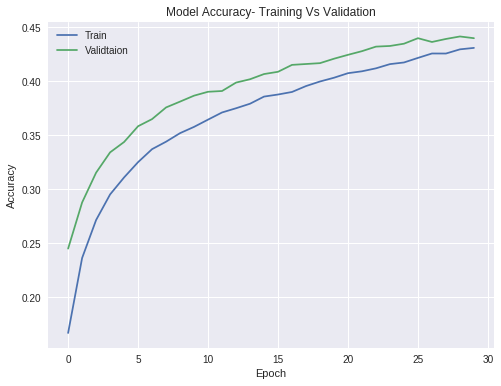

In [44]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

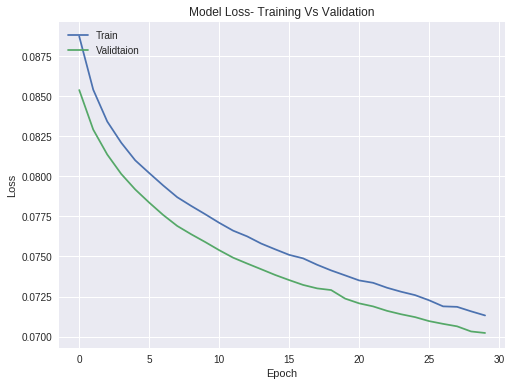

In [45]:
# Plotting Model Accuracy- Training Vs Validation
plotModelLoss(history)

**Observation on changing Activation Function**

Tanh

*   Test Loss: 0.0724
*   Test Accuracy: 0.4183

Sigmoid

*   Test Loss: 0.0871
*   Test Accuracy: 0.2413

Elu

*   Test Loss: 0.0716
*   Test Accuracy: 0.4271

Leaky Relu

*   Test Loss: 0.0702
*   Test Accuracy: 0.4398


Accuracy is maximum in the the benchmark model with Relu activation function.
  

Dropouts Rate

Dropout rate =0.1

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model8_1 = Sequential()
model8_1.add(Dense(512, activation='relu', input_shape=(3072,)))
model8_1.add(Dropout(0.1))
model8_1.add(Dense(512, activation='relu'))
model8_1.add(Dropout(0.1))
model8_1.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model8_1.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [106]:
# Lets fit the data into the model created
history = model8_1.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model8_1.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 67us/step - loss: 0.0879 - acc: 0.1878 - val_loss: 0.0849 - val_acc: 0.2642
Epoch 2/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0842 - acc: 0.2607 - val_loss: 0.0822 - val_acc: 0.3039
Epoch 3/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0823 - acc: 0.2927 - val_loss: 0.0805 - val_acc: 0.3289
Epoch 4/30
50000/50000 [==============================] - 2s 47us/step - loss: 0.0808 - acc: 0.3157 - val_loss: 0.0793 - val_acc: 0.3487
Epoch 5/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0797 - acc: 0.3366 - val_loss: 0.0782 - val_acc: 0.3578
Epoch 6/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0787 - acc: 0.3456 - val_loss: 0.0775 - val_acc: 0.3685
Epoch 7/30
50000/50000 [==============================] - 2s 45us/step - loss: 0.0780 - acc: 0.3543 - val_loss: 0.0768 - val_acc

In [107]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.06949140557050705
Test accuracy: 0.4498


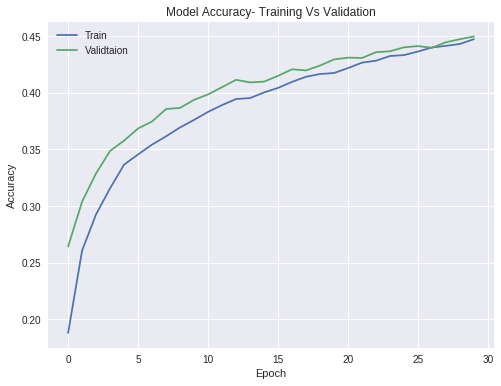

In [108]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

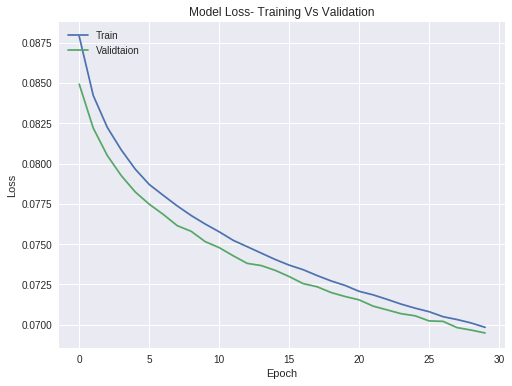

In [109]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

Dropout rate= 0.5

In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 200 
num_classes = 10
epochs = 30 

In [0]:
# Creating a model and adding various layers
model8_2 = Sequential()
model8_2.add(Dense(512, activation='relu', input_shape=(3072,)))
model8_2.add(Dropout(0.5))
model8_2.add(Dense(512, activation='relu'))
model8_2.add(Dropout(0.5))
model8_2.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model8_2.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [113]:
# Lets fit the data into the model created
history = model8_2.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model8_2.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 3s 67us/step - loss: 0.0910 - acc: 0.1323 - val_loss: 0.0875 - val_acc: 0.2358
Epoch 2/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.0880 - acc: 0.1868 - val_loss: 0.0858 - val_acc: 0.2540
Epoch 3/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.0867 - acc: 0.2104 - val_loss: 0.0845 - val_acc: 0.2785
Epoch 4/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.0857 - acc: 0.2291 - val_loss: 0.0832 - val_acc: 0.2883
Epoch 5/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.0848 - acc: 0.2451 - val_loss: 0.0823 - val_acc: 0.3080
Epoch 6/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.0840 - acc: 0.2587 - val_loss: 0.0815 - val_acc: 0.3211
Epoch 7/30
50000/50000 [==============================] - 2s 46us/step - loss: 0.0834 - acc: 0.2683 - val_loss: 0.0807 - val_acc

In [114]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.07337131333351135
Test accuracy: 0.4133


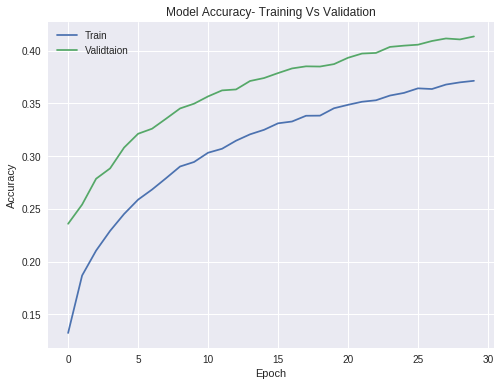

In [115]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

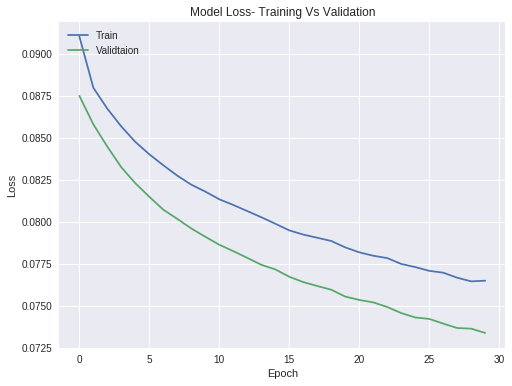

In [116]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

**Observation on changing Dropout Factor**

Dropout - 0.1

    Test Loss: 0.0694
    Test Accuracy: 0.4498

Dropout - 0.005

    Test Loss: 0.0733
    Test Accuracy: 0.4133

Accuracy increases on in increasing the dropout factor, and decreases on decreasing the dropout.


**Creating a model from the insights observed from above**

Lets try a configuration where the accuracy has increased

* batch_size = 100 
* num_classes = 10
* epochs = 70 
* Number of neurons per layer = 1.5* 512 =768
* Number of hidden layers =  2
* Learning Rate = 0.1
* Activation Function = Relu
* Dropout Factor = 0.1





In [0]:
# Defining Batch size, num_classes and epochs
batch_size = 100
num_classes = 10
epochs = 70

In [0]:
# Creating a model and adding various layers
model9 = Sequential()
model9.add(Dense(768, activation='relu', input_shape=(3072,)))
model9.add(Dropout(0.1))
model9.add(Dense(768, activation='relu'))
model9.add(Dropout(0.1))
model9.add(Dense(num_classes, activation='softmax'))

In [0]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model9.compile(loss='mean_squared_error', optimizer=sgd,metrics=['accuracy'])

In [53]:
# Lets fit the data into the model created
history = model9.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model9.evaluate(x_test, y_test, verbose=0)

Train on 50000 samples, validate on 10000 samples
Epoch 1/70
50000/50000 [==============================] - 4s 85us/step - loss: 0.0797 - acc: 0.3218 - val_loss: 0.0749 - val_acc: 0.3871
Epoch 2/70
50000/50000 [==============================] - 4s 76us/step - loss: 0.0737 - acc: 0.4029 - val_loss: 0.0713 - val_acc: 0.4298
Epoch 3/70
50000/50000 [==============================] - 4s 74us/step - loss: 0.0710 - acc: 0.4314 - val_loss: 0.0703 - val_acc: 0.4363
Epoch 4/70
50000/50000 [==============================] - 4s 73us/step - loss: 0.0693 - acc: 0.4489 - val_loss: 0.0677 - val_acc: 0.4641
Epoch 5/70
50000/50000 [==============================] - 4s 74us/step - loss: 0.0676 - acc: 0.4628 - val_loss: 0.0673 - val_acc: 0.4632
Epoch 6/70
50000/50000 [==============================] - 4s 74us/step - loss: 0.0664 - acc: 0.4752 - val_loss: 0.0655 - val_acc: 0.4822
Epoch 7/70
50000/50000 [==============================] - 4s 75us/step - loss: 0.0652 - acc: 0.4888 - val_loss: 0.0655 - val_acc

In [54]:
# Test Loss and Test Accuracy
score_loss_accuracy(score)

Test loss: 0.0589128716468811
Test accuracy: 0.5746


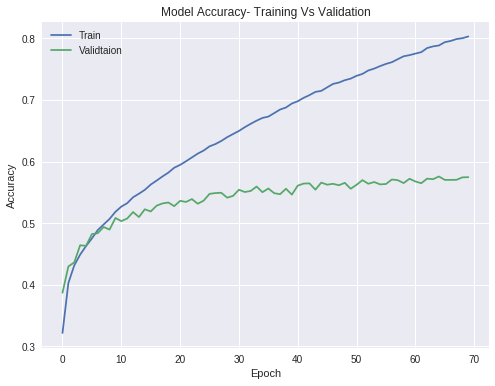

In [55]:
# Plotting Model Accuracy- Training Vs Validation
plotModelAccuracy(history)

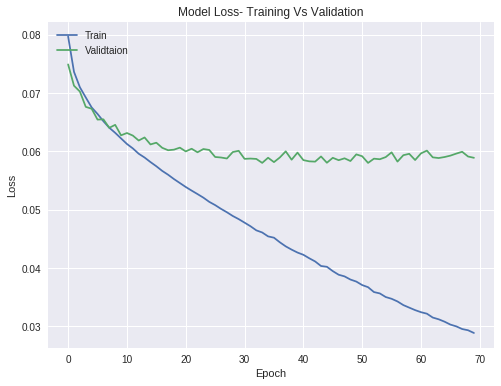

In [56]:
# Plotting Model Loss- Training Vs Validation
plotModelLoss(history)

Although this model gets us a better accuracy, It seems to highly overfit as there is huge difference between Training and Validation model

**You are expected to provide a recommendation for the best model you would
recommend for classification. Which model (with parameter values) would you choose
and why?**

I would recommend the model with the following configuration: 


    batch_size = 200
    num_classes = 10
    epochs = 30
    Number of neurons per layer = 512
    Number of hidden layers = 2
    Learning Rate = 0.1
    Activation Function = Relu
    Dropout Factor = 0.2
    
 I have chosen this model as it provides best accuracy with less overfitting and underfitting and thus the training and validation accuracy and loss are close to each other.

Resulting Metrics:

* Train Accuracy: 0.5668 
* Validation Accuracy: 0.5300

* Train Loss: 0.0570
* Validation Loss: 0.0603


**Comment on how good your model is ? Does it overfit/underfit data ? What could you
do to improve the model?**

As per various models tested, I have found the recommended model is better than others as it has one of the least overfitting on the validation data. We can try to increasing the dropout factor to reduce its overfitting. 